In [ ]:
import os
import numpy as np
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
fname = "kay_images.npz"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/ymnjv/download

In [ ]:
with np.load(fname) as dobj:
    dat = dict(**dobj)

print(list(dat))
print(dat["stimuli"].shape,dat["stimuli_test"].shape,dat["responses"].shape,
      dat["responses_test"].shape,dat["roi"].shape,dat["roi_names"].shape)



['stimuli', 'stimuli_test', 'responses', 'responses_test', 'roi', 'roi_names']
(1750, 128, 128) (120, 128, 128) (1750, 8428) (120, 8428) (8428,) (8,)


In [ ]:
responses = dat["responses"]
print(responses.shape)

labels = np.zeros((1750,), dtype=int)
# 0 = undefined
# 1 = people
# 2 = food
# 3 = monkeys
# 4 = buildings

people_idx = np.array([0, 19, 20, 21, 24, 26, 30, 40, 51, 54, 62, 83, 88, 109, 
                      125, 126, 131, 132, 133, 138, 144, 152, 167, 169, 194, 
                      213, 230, 268, 288, 290, 292, 316, 320, 321, 340, 342, 
                      344, 354, 357, 360, 364, 376, 401, 409, 427, 439, 441, 
                      449, 454, 497, 510, 520, 524, 544, 569, 571, 587, 596, 
                      598, 614, 621, 623, 638, 649, 661, 688, 706, 710, 714, 
                      752, 753, 763, 765, 791, 793, 794, 795, 800, 807, 812, 
                      845, 858, 864, 865, 873, 875, 883, 901, 913, 926, 930, 
                      964, 965, 984, 994, 1000, 1009, 1022, 1024, 1029, 1036, 
                      1047, 1052, 1079, 1151, 1155, 1162, 1177, 1187, 1201, 
                      1215, 1230, 1232, 1243, 1245, 1266, 1272, 1288, 1293, 
                      1301, 1308, 1309, 1315, 1319, 1320, 1331, 1333, 1383, 
                      1391, 1436, 1439, 1474, 1479, 1510, 1521, 1536, 1541, 
                      1547, 1567, 1570, 1577, 1580, 1582, 1583, 1598, 1605, 
                      1616, 1619, 1637, 1638, 1642, 1643, 1648, 1656, 1660, 
                      1669, 1682, 1698, 1701, 1720, 1721, 1724, 1725, 1743])

food_idx = np.array([15, 78, 92, 93, 102, 105, 115, 163, 164, 171, 174, 183,
                     195, 205, 271, 278, 298, 336, 349, 374, 381, 387, 474,
                     535, 568, 612, 617, 700, 708, 713, 718, 728, 737, 745,
                     759, 829, 831, 836, 888, 903, 906, 914, 936, 945, 970,
                     991, 998, 1030, 1041, 1043, 1057, 1082, 1090, 1093, 1100,
                     1111, 1173, 1174, 1186, 1189, 1193, 1220, 1222, 1265, 1275,
                     1281, 1356, 1396, 1407, 1411, 1471, 1544, 1620, 1717, 1730])

monkey_idx = np.array([13, 77, 103, 204, 233, 248, 325, 345, 351, 435, 465,
                       547, 604, 674, 677, 801, 840, 854, 905, 910, 923, 941,
                       983, 1031, 1049, 1058, 1077, 1080, 1081, 1097, 1109,
                       1126, 1142, 1148, 1166, 1205, 1224, 1264, 1285, 1286,
                       1367, 1376, 1382, 1404, 1425, 1453, 1469, 1475, 1478,
                       1599, 1604, 1626, 1629, 1649])

building_idx = np.array([10, 22, 35, 72, 107, 111, 120, 142, 160, 162, 182,
                          214, 217, 220, 221, 235, 258, 273, 289, 356, 359,
                          363, 368, 377, 378, 383, 402, 403, 448, 463, 477,
                          526, 543, 548, 559, 566, 610, 634, 707, 775, 822,
                          841, 844, 859, 897, 916, 938, 956, 959, 974, 1003,
                          1005, 1068, 1198, 1203, 1214, 1231, 1248, 1256, 1269,
                          1287, 1327, 1335, 1340, 1348, 1361, 1369, 1466, 1553,
                          1554, 1590, 1595, 1622, 1633, 1651, 1653, 1665, 1716,
                          1747, 1748])
snake_idx = np.array([294, 309, 457, 482, 580, 586, 918, 928, 1384, 1408, 1438,
                      1457, 1459, 1461, 1543])

tree_idx = np.array([14, 28, 38, 413, 494, 1130, 1161, 1213, 1263, 1274, 1289,
                     1337, 1433, 1434, 1498, 1559, 1677, 1681, 1708])

zebra_idx = np.array([66, 252, 253, 639, 1156, 1163, 1200, 1565, 1610])

labels[people_idx] = 1
labels[food_idx] = 2
labels[monkey_idx] = 1
labels[building_idx] = 2
labels[snake_idx] = 1
labels[tree_idx] = 3
labels[zebra_idx] = 1

(1750, 8428)


In [ ]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, perplexity=7, random_state=2020) 

In [ ]:
embed = tsne_model.fit_transform(responses)
print(embed.shape)

(1750, 2)


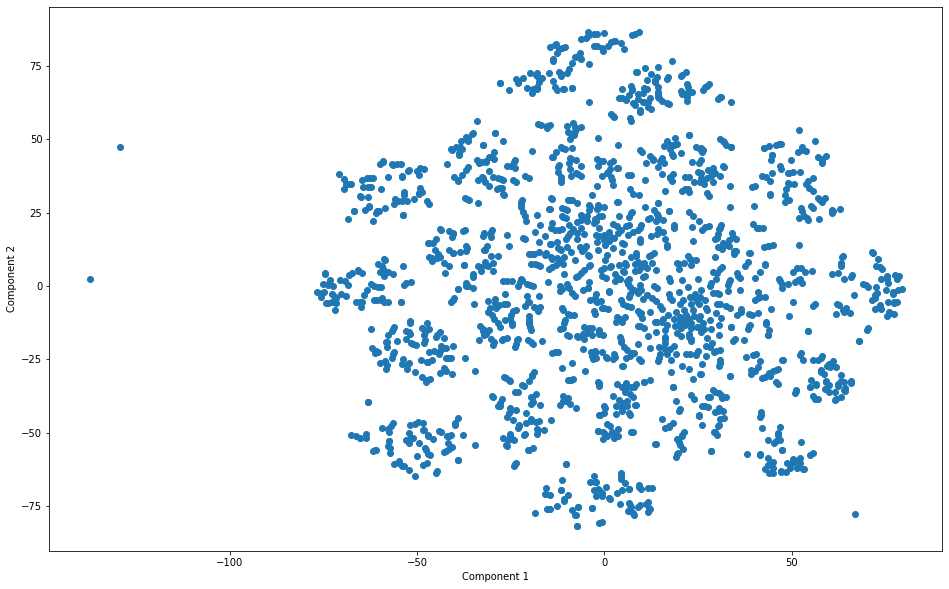

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
cmap = plt.cm.get_cmap('tab10')
plt.scatter(x=embed[:,0], y=embed[:,1],cmap=cmap)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.clim(-0.5, 9.5)
plt.show()

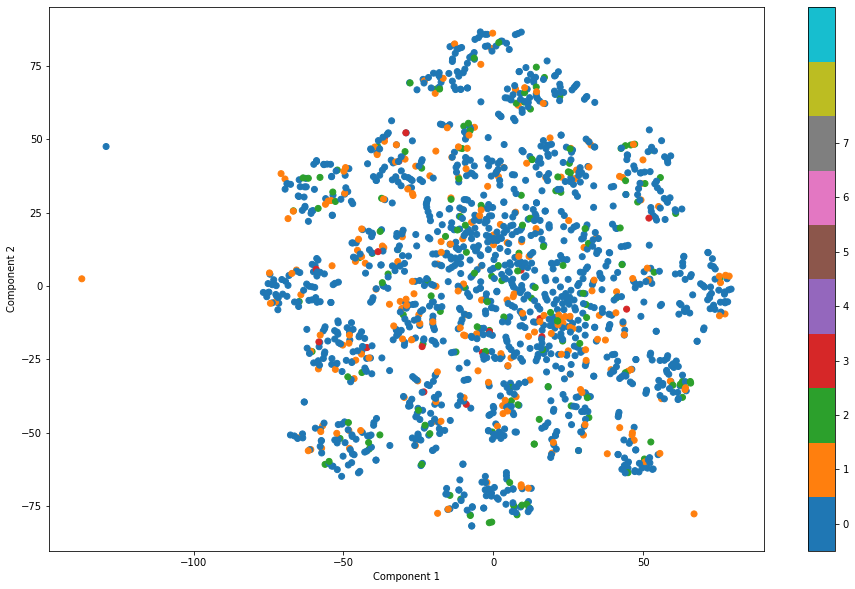

In [ ]:
plt.figure(figsize=(16,10))
cmap = plt.cm.get_cmap('tab10')
plt.scatter(x=embed[:,0], y=embed[:,1], c=labels,cmap=cmap)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(ticks=range(8))
plt.clim(-0.5, 9.5)
plt.show()

In [14]:
from sklearn.manifold import TSNE
tsne_model1 = TSNE(n_components=3, perplexity=10, random_state=2020) 

embed1 = tsne_model1.fit_transform(responses)
print(embed.shape)

(1750, 2)


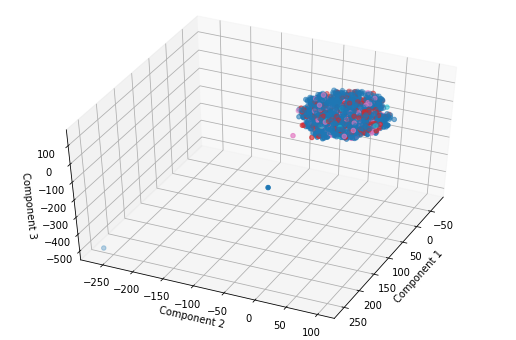

In [21]:
from mpl_toolkits.mplot3d import Axes3D

ax1 = plt.figure(figsize=(9,6)).gca(projection='3d')
cmap = plt.cm.get_cmap('tab10')
ax1.scatter(xs=embed1[:,0], ys=embed1[:,1], zs=embed1[:,2], c=labels,cmap=cmap)
ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_zlabel('Component 3')
ax1.view_init(45, 25)
plt.show()